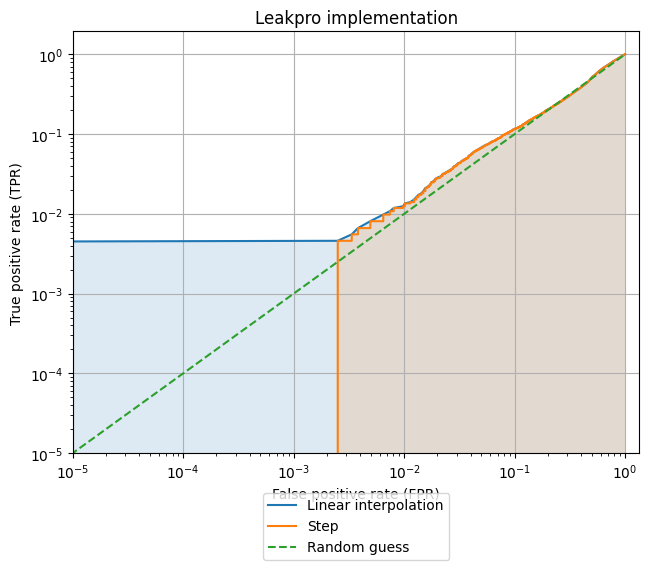

        fpr       tpr
0  0.000000  0.000002
1  0.002504  0.004592
2  0.003351  0.005532
3  0.003816  0.006624
4  0.004936  0.008083


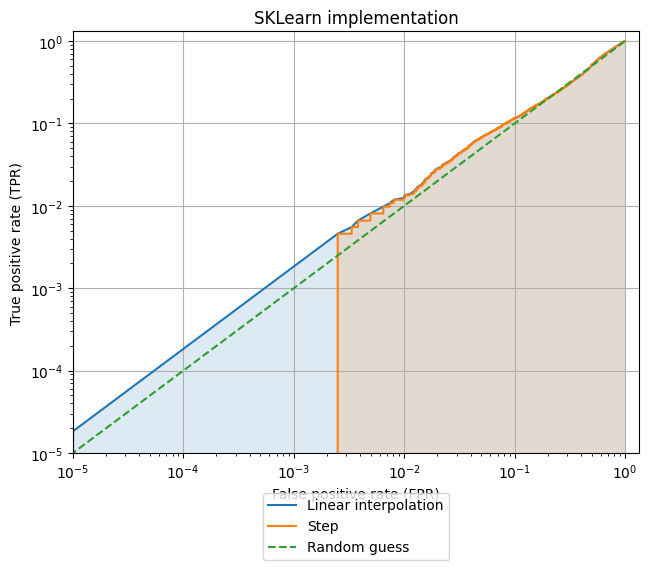

        fpr       tpr
0  0.000000  0.000000
1  0.002502  0.004592
2  0.003350  0.005532
3  0.003816  0.006622
4  0.004934  0.008083


<Figure size 640x480 with 0 Axes>

In [27]:
from sklearn.metrics import roc_curve
import json, matplotlib.pyplot as plt, numpy as np, pandas as pd

file_name = "data/rmia_transformations/ELD/NHiTS/RMIA-attack_data_fraction=0.01-gamma=2.0-individual_mia=False-num_shadow_models=64-offline_a=0.33-online=True-signal_name=TrendLoss-temperature=2.0-training_data_fraction=0.5-transformation_name=arctan/result.json"
with open(file_name) as f:
    j = json.load(f)

def korv(fpr, tpr, bajs):
    plt.fill_between(fpr, tpr, alpha=0.15)
    plt.plot(fpr, tpr, label="Linear interpolation")

    plt.fill_between(fpr, tpr, alpha=0.15, step="post")
    plt.step(fpr, tpr, label="Step", where="post")

    #plt.scatter(fpr, tpr, s=20, marker="x", color="red")

    # Plot baseline (random guess)
    range01 = np.linspace(0, 1)
    plt.plot(range01, range01, "--", label="Random guess")

    # Set plot parameters
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(left=1e-5)
    plt.ylim(bottom=1e-5)
    plt.tight_layout()
    plt.grid()
    plt.legend(bbox_to_anchor =(0.5,-0.27), loc="lower center")

    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title(bajs)
    plt.show()
    plt.clf()

fpr, tpr = j["fpr"], j["tpr"]
korv(fpr, tpr, "Leakpro implementation")
print(pd.DataFrame({"fpr": fpr, "tpr": tpr}).head())

fpr, tpr, _ = roc_curve(j["true_labels"], j["signal_values"], drop_intermediate=False)
korv(fpr, tpr, "SKLearn implementation")
print(pd.DataFrame({"fpr": fpr, "tpr": tpr}).head())
